# Метрики Precision и  recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
data = pd.read_csv('datasets/accurracy/affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [40]:
from sklearn.linear_model import LogisticRegression

# импотируем метод для автоматической разюивки на обучающую и тестовую выборки
# ранее использовали from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [41]:
 X = pd.get_dummies(data, columns=['occupation', 'occupation_husb', 'religious'])

In [42]:
X.head()

,rate_marriage,age,yrs_married,children,educ,affair,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,...,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0
0,3.0,32.0,9.0,3.0,17.0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3.0,27.0,13.0,3.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,16.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,16.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [43]:
del X['affair']
X.head()

,rate_marriage,age,yrs_married,children,educ,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,...,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0
0,3.0,32.0,9.0,3.0,17.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3.0,27.0,13.0,3.0,14.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,16.0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,16.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,14.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [44]:
y = data['affair']

In [45]:
model = LogisticRegression(n_jobs=12, max_iter=100)

Разбиваем данные на обучающую и тестовую выборки в соотношении 70/30

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
print(len(X_train) / len(X))
print(len(y_train) / len(y))

0.6999685830977066
0.6999685830977066


Обучаем модель

In [48]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=12)

Получаем прогнозные значения модели (переменная predictions)

In [49]:
predictions = model.predict_proba(X_test)

In [50]:
for line in zip(predictions[:, 1], y_test):
    print(line[0]*100, line[1])

65.50733384708425 0
7.522120964498795 0
27.298199456907028 0
26.58756629738664 0
25.911164093980087 1
14.793441418931241 0
17.481095061659733 0
21.532443011348402 0
75.84014579614833 1
26.223546761866185 0
11.246213949403327 0
18.711423651858144 0
8.096306547774134 0
30.424078683586636 0
73.4852810327234 1
60.20600847343256 0
29.54433651201922 0
72.5495175449802 1
30.060812059717374 0
15.567184709406675 0
21.535090749398297 1
44.65469784604015 1
7.511124082685115 1
46.9723733084038 1
17.27542106199726 0
17.11483951065388 0
40.94416043552177 0
36.80772009531908 0
24.1396302398667 0
14.29335787304539 0
14.173058694756554 0
29.967981153529355 1
21.105287119409386 0
50.95569225052989 1
62.516809428157806 1
39.758590739210305 1
10.877478383111697 0
20.033018964664386 0
28.544885943523234 1
15.795695251384966 0
39.078980223059325 1
29.13463018609584 0
14.919212104257271 0
40.811048381045865 0
29.09923069268507 1
38.96338157795384 1
42.77720594393191 1
13.37417606204267 0
9.538940733099738 0


38.60102995015361 0
47.48787709265517 0
9.79911691436521 0
29.24114192383447 0
38.054411440682934 1
26.4480141947686 0
67.05049113948705 1
39.25402584930499 0
5.993603574587564 0
9.79911691436521 1
22.19128832539299 0
11.996387780609016 0
48.80073532086427 1
36.166582730756524 0
61.04860979640904 1
44.407422885954766 0
29.969622714548134 0
46.46584956184941 0
45.411174177458555 1
20.944377516693663 0
23.274454111384856 0
17.963781111674347 0
22.855231102171086 1
59.00920950624875 0
11.516590906939332 0
21.446209414854362 0
18.404964627045302 0
31.785524111252872 0
30.475132410209365 0
13.741937695374087 0
26.43321391151961 0
34.067073255442764 0
17.315097511317077 1
8.968919327265628 0
18.430754308023793 0
16.34434591548054 0
14.408491472688018 0
23.273079741638288 1
6.851444176371621 1
16.497195665436852 0
61.611934410217195 0
5.94963958672175 0
64.74859273079801 1
17.657514571917535 1
10.218036365326064 0
63.707760393726495 1
14.377520170554575 0
26.18151641608381 0
23.5669345597099 

22.193703447187907 0
23.685487267335002 0
47.999442457694094 0
26.605691343268756 0
31.242320470863778 0
67.29309167120616 1
24.11700694506946 0
20.674670529853678 1
31.752913208099493 0
30.708604224962166 1
36.56393355464109 1
21.059107533369776 1
62.45198551955791 1
65.11291769920739 1
14.789174269508083 0
34.15873313205769 0
17.252825582728086 0
12.94224644741863 0
6.054762008127755 0
28.36124619999737 0
16.8722566007042 0
29.519411552685384 1
51.99219004240682 0
41.170543012473296 1
19.74461691487425 1
37.29523454087674 0
19.45302944558733 0
16.70485496419756 0
62.09507809421054 0
35.068099845392666 1
40.326392048609435 0
24.30377734145296 0
23.44962510776759 1
68.42642872536071 1
17.90549103821146 1
10.598407146322828 0
47.626575371955276 0
47.76582714658785 0
29.06970049914706 0
21.0666515705297 0
37.682397331991815 0
5.857263210243616 0
25.300906482686525 1
15.396905501094004 0
38.41114540841063 1
54.62044107117215 0
29.959375294628593 0
26.405286717390254 0
33.692577953416915 0

In [51]:
model.score(X_test, y_test)

0.7308900523560209

In [52]:
for state in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)
    model.fit(X_train, y_train)
#     for line in zip(predictions[:, 1], y_test):
#         print(line[0]*100, line[1])
    print(state, model.score(X_test, y_test) * 100,'%')

0 73.08900523560209 %
1 73.08900523560209 %
2 71.51832460732984 %
3 71.98952879581152 %
4 71.2565445026178 %
5 72.35602094240838 %
6 71.09947643979058 %
7 73.24607329842931 %
8 72.25130890052355 %
9 71.93717277486911 %


### Оценка качества модели

Счетаем Accuracy последней модели

In [53]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predict_prob, actual in zip(predictions[:, 1], y_test):
    
    if predict_prob > .5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [54]:
# Какая получилась точность
(tp + tn) / (tp + fp + fn + tn)

0.7193717277486911

## Используем готовые библиотеки

In [75]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix

In [76]:
pr, reca11, thres = precision_recall_curve(y_test, predictions[:, 1])

In [77]:
# посмотрим, что получилось
for line in zip(pr, reca11, thres):
    print(line)

(0.3086225026288118, 1.0, 0.03862708124015701)
(0.30825881115202525, 0.9982964224872232, 0.03874640093629297)
(0.30842105263157893, 0.9982964224872232, 0.03909566275568514)
(0.3080568720379147, 0.9965928449744463, 0.03939749009003895)
(0.3082191780821918, 0.9965928449744463, 0.0404934544960408)
(0.3083816552451239, 0.9965928449744463, 0.04116893001036081)
(0.30854430379746833, 0.9965928449744463, 0.04336894314422858)
(0.3087071240105541, 0.9965928449744463, 0.04463281107814015)
(0.308870116156283, 0.9965928449744463, 0.044666386735889144)
(0.3090332805071315, 0.9965928449744463, 0.045204694071028846)
(0.3091966173361522, 0.9965928449744463, 0.04662822182264188)
(0.3093601269169751, 0.9965928449744463, 0.04690627899314252)
(0.30952380952380953, 0.9965928449744463, 0.04710675270031474)
(0.3096876654314452, 0.9965928449744463, 0.04746653494280159)
(0.3098516949152542, 0.9965928449744463, 0.04818232257356959)
(0.31001589825119236, 0.9965928449744463, 0.04843955321216585)
(0.310344827586206

In [78]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


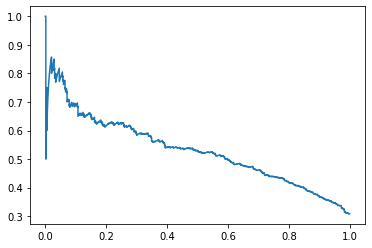

In [84]:
# print(reca11.shape, pr.shape)
plt.plot(reca11, pr)

In [85]:
from sklearn.metrics import average_precision_score, f1_score

In [81]:
# Площадь под кривой
average_precision_score(y_test, predictions[:, 1])

0.5314471128079572

In [108]:
F1 = 2 * (pr * reca11) / (pr + reca11)
F1

array([0.47167537, 0.47106109, 0.4712505 , ..., 0.00339559, 0.00340136,
       0.        ])

## ROC

In [ ]:
# Посчитаем ROC-кривую (Receiver Operational Characteristic)
from sklearn.metrics import roc_curve